# **0. Subir el Dataset, limpiarlo y darle formato a sus columnas**

Inicialmente se cargaron las librerias necesarias en el proceso de tratamiento de la base. Para facilitar el trabajo en Colab, se ubico el Dataset en el drive del equipo y se extrajo el link de este, de esta manera no tendrá que descargarse y subir cada vez que se ejecute el código. Se le asigna un nombre más sencillo para facilidad de manejo y se verifica que carga correctamente ejecutando el código.

In [78]:
import gdown    # Libreria para importar desde Google Drive el dataset

import pandas as pd   # Para el manejo de la base de datos

import matplotlib.pyplot as plt   # Para graficar
import seaborn as sns   # Para graficar

In [79]:
file_id = "1PyveXXGr1VmjGV9mrsTb7NWsHPWnGhnz"   # Extraer del link de Drive 🔄

url = f"https://drive.google.com/uc?id={file_id}"   # Se le asigna un nombre más fácil de manejar al archivo de Drive

df_ZNI = pd.read_csv(gdown.download(url, quiet=False))    # Carga la base y lee los datos según la forma como están codificados

Downloading...
From: https://drive.google.com/uc?id=1PyveXXGr1VmjGV9mrsTb7NWsHPWnGhnz
To: /content/Estado_de_la_prestaci_n_del_servicio_de_energ_a_en_Zonas_No_Interconectadas_20250727.csv
100%|██████████| 653k/653k [00:00<00:00, 7.18MB/s]


In [80]:
print(f"Dataset cargado: {df_ZNI.shape}")   # Lee el número de filas y columnas que tiene la abse de datos

df_ZNI.tail(3)    # Verifica que se cargan correctamente los datos extrayendo una parte de esta

Dataset cargado: (4660, 14)


,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
4657,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA,2025,3,45876,12716.0,134.82,jueves,03/20/2025 06:30:00 PM,14.51
4658,99,VICHADA,99001,PUERTO CARREÑO,99001000,PUERTO CARREÑO,2025,3,3125928,768017.0,5734.08,jueves,03/13/2025 02:00:00 PM,23.69
4659,99,VICHADA,99773,CUMARIBO,99773000,CUMARIBO,2025,3,426253,150920.0,831.79,miércoles,03/26/2025 03:00:00 PM,23.73


## **Guía de Conceptos clave**
A continuación se presenta una tabla con las variables principales que se usarán a lo largo de todo el análisis junto con una pequeña definición de cada una para tener claridad de los datos con los que se trabajarán:


| Columna                    | Explicación                                                                |
| -------------------------- | ------------------------------------------------------------------------------- |
| `ENERGÍA ACTIVA`           | Es la energía **realmente utilizada** para hacer funcionar aparatos eléctricos. |
| `ENERGÍA REACTIVA`         | Es energía que **va y viene** sin usarse, causada por motores, neveras, etc.    |
| `POTENCIA MÁXIMA`          | Es el **pico más alto de consumo** registrado en un momento específico del mes. |
| `PROMEDIO DIARIO EN HORAS` | Cuántas horas al día hubo servicio eléctrico.                                   |




In [81]:
df_ZNI.dtypes   # Es importante reconocer el tipo datos para su tratamiento

,0
ID DEPATAMENTO,int64
DEPARTAMENTO,object
ID MUNICIPIO,int64
MUNICIPIO,object
ID LOCALIDAD,int64
LOCALIDAD,object
AÑO SERVICIO,int64
MES SERVICIO,int64
ENERGÍA ACTIVA,int64
ENERGÍA REACTIVA,float64


# **1. Ajuste y limpieza del Dataset**

En esta sección se identificaron los distinos obstáculos y se corrigieron con el objetivo de evitar posibles errores  para el correcto tratamiento de la base de datos

### **Corrección Datos de ubicación (Departamento, municipio y localidad)**

In [82]:
# Como hay muchas columnas, decidí que para identificar Departamento, Municipio y Localidad solo dejaría {Departamento, Municipio, ID_Localidad }

#Por cierto, los nombres de las columnas están mal puestos, disq "Depatamento" se comieron la R

df_ZNI['ID DEPATAMENTO'].value_counts(dropna=False)   #Alguien colocó en el ID departamento "0", hay que revisarlo

,count
ID DEPATAMENTO,
27,1345
52,861
19,675
99,215
18,215
97,179
76,178
91,170
13,151


Se identificó que uno de los datos en la base no se le asigno número de ID, se procedió a buscar qué dato era este y a corregir el error:

In [83]:
filtro1 = df_ZNI[df_ZNI['ID DEPATAMENTO'] == 0]   # Filtra la base para identificar el dato que tiene ID = 0

filtro1

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
1231,0,CAUCA,19809,TIMBIQUÍ,19809014,CHACÓN (TIMBIQUÍ - CAUCA),2023,2,3457,909.0,25.76,lunes,02/06/2023 07:00:00 PM,5.57


Al identificar que este dato pertenece al departamento del Cauca, se le asigna el ID que le pertenece

In [84]:
filtro2 = df_ZNI[df_ZNI['DEPARTAMENTO'] == "CAUCA"]  # Busca cuál es el ID  del departamento del Cauca

filtro2['ID DEPATAMENTO'].head(3)

,ID DEPATAMENTO
9,19
10,19
11,19


In [85]:
df_ZNI['ID DEPATAMENTO'].replace(0, 19, inplace=True)   # Reemplaza el 0 por el número de ID real que le pertenece al departamento 🔄

/tmp/ipython-input-1665350459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ZNI['ID DEPATAMENTO'].replace(0, 19, inplace=True)   # Reemplaza el 0 por el número de ID real que le pertenece al departamento 🔄


In [86]:
df_ZNI['ID DEPATAMENTO'].value_counts()   # Verifica que se haya efectuado el cambio

,count
ID DEPATAMENTO,
27,1345
52,861
19,676
18,215
99,215
97,179
76,178
91,170
13,151


Otro error que se pudo identificar es en cuestión de ortografía. Hubo datos en los cuales la base no tomó las tildes que tienen algunos departamentos, por lo que asumió que eran datos distintos. En está ocasión se procedió a crear un diccionario con la forma escrita correcta de los departamentos en la base y que quedaran con una única clasificación por cada uno. x

In [87]:
df_ZNI['DEPARTAMENTO'].value_counts(dropna=False).sort_index()    # Muestra los departamentos como índices y el número de datos que contiene cada uno

,count
DEPARTAMENTO,
AMAZONAS,170
ANTIOQUIA,95
ARCHIPIELAGO DE SAN ANDRES,2
ARCHIPIÉLAGO DE SAN ANDRÉS,6
ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,28
"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA",65
BOLIVAR,3
BOLÍVAR,148
CAQUETA,3


In [88]:
# Creación del diccionario con cada uno de los departamentos (con sus nombres correctos) y sus respectivo ID

dicc_num_dpto = {27:"CHOCÓ", 52:"NARIÑO",	19:"CAUCA",	18:"CAQUETÁ",	99:"VICHADA",	97:"VAUPÉS", 76:"VALLE DEL CAUCA",
                 91:"AMAZONAS",	13:"BOLÍVAR",	94:"GUAINÍA",	88:"SAN ANDRÉS, P & SC",
                 	5:"ANTIOQUIA",	86:"PUTUMAYO",	47:"MAGDALENA",	50:"META",	95:"GUAVIARE",	44:"LA GUAJIRA",	85:"CASANARE"}

df_ZNI['ID DEPATAMENTO'].replace(dicc_num_dpto,inplace=True) # 🔄

df_ZNI.head(2)

/tmp/ipython-input-2494189727.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ZNI['ID DEPATAMENTO'].replace(dicc_num_dpto,inplace=True) # 🔄


,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,AMAZONAS,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2024,6,3994102,1010671.0,7824.51,Jueves,06/20/2024 03:30:00 PM,24.0
1,AMAZONAS,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,6,127838,40378.0,256.00,Miércoles,06/05/2024 06:15:00 PM,24.0


In [89]:
import re  #Como son más de 500 municipios, se optó por corregir sus nombres usando la librería re

def mejor_nombre(nombres):
    # Prioriza nombres con tildes, luego por longitud
    return max(nombres, key=lambda x: (bool(re.search(r'[áéíóúüñ]', x.lower())), len(x))) # 🔄🔄🔄🔄

df_ZNI['MUNICIPIO'] = df_ZNI.groupby('ID MUNICIPIO')['MUNICIPIO'].transform(lambda x: mejor_nombre(x.unique()))

In [90]:
filtro3 = df_ZNI[df_ZNI['MUNICIPIO'].str.startswith("PROVID")]
filtro3.head(4)

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
3,"SAN ANDRÉS, P & SC",ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,6,1284196,274864.0,2241.56,Miércoles,06/12/2024 02:15:00 PM,24.00
86,"SAN ANDRÉS, P & SC",ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,7,1308682,275839.0,2229.81,Miercoles,07/10/2024 10:30:00 PM,24.00
162,"SAN ANDRÉS, P & SC",ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,5,1331271,284638.0,2190.28,Viernes,05/10/2024 03:00:00 PM,23.59
234,"SAN ANDRÉS, P & SC",ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,1,1209660,254221.0,2028.26,Jueves,01/04/2024 09:30:00 PM,23.57


In [91]:
df_ZNI.drop(['DEPARTAMENTO', 'ID MUNICIPIO', 'LOCALIDAD', 'FECHA DE DEMANDA MÁXIMA', 'DÍA DE DEMANDA MÁXIMA'], axis=1, inplace=True) #Se eliminaron las columnas que NO se van a usar
df_ZNI.head(1)

,ID DEPATAMENTO,MUNICIPIO,ID LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,AMAZONAS,LETICIA,91001000,2024,6,3994102,1010671.0,7824.51,24.0


In [92]:
df_ZNI.rename(columns={"ID DEPATAMENTO": "Departamento",
                       "MUNICIPIO": "Municipio", "AÑO SERVICIO": "Año",
                       "MES SERVICIO":"Mes", "ID LOCALIDAD": "Localidad",
                       "PROMEDIO DIARIO EN HORAS":"hrs/dia_servicio", 'ENERGÍA ACTIVA': 'energ_act',
                       'ENERGÍA REACTIVA': 'energ_react', 'POTENCIA MÁXIMA': 'potencia_max'},
                         inplace=True)
df_ZNI.head(4)

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,2024,6,3994102,1010671.0,7824.51,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,2024,6,127838,40378.0,256.00,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,2024,6,26578,11917.0,101.43,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,2024,6,1284196,274864.0,2241.56,24.00


### **Gráficas exploratorias**

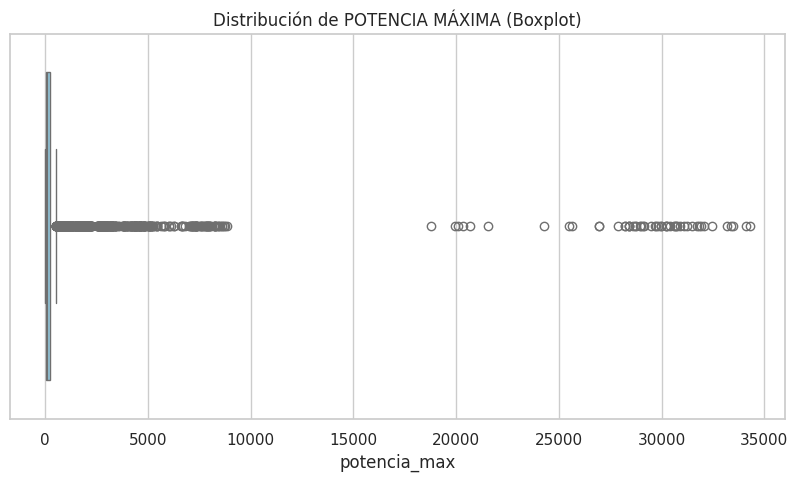

Estadísticas descriptivas de POTENCIA MÁXIMA:
count     4660.000000
mean       741.366421
std       3216.753034
min          0.000000
25%         31.497500
50%         64.990000
75%        221.242500
max      34290.650000
Name: potencia_max, dtype: float64
Valores nulos en POTENCIA MÁXIMA: 0
Valores iguales a 0: 47


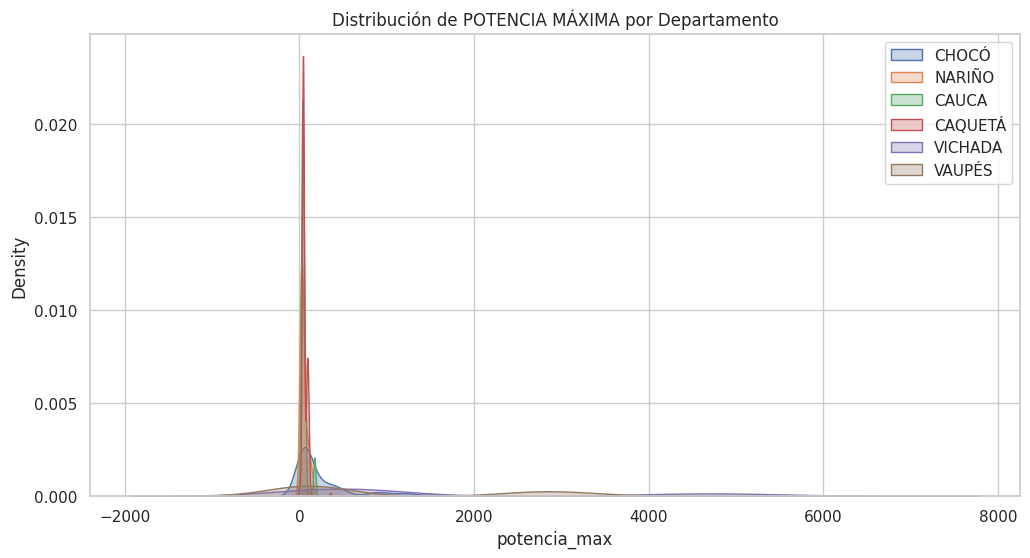


Posibles apagones detectados: 224 registros
       Departamento             Municipio   Año  Mes  potencia_max
23            CHOCÓ  BAJO BAUDÓ (PIZARRO)  2024    6          7.21
25            CHOCÓ  BAJO BAUDÓ (PIZARRO)  2024    6          6.24
36            CHOCÓ                 NUQUÍ  2024    6          5.35
40            CHOCÓ              RIOSUCIO  2024    6          4.33
50           NARIÑO             EL CHARCO  2024    6          6.43
53           NARIÑO               LA TOLA  2024    6          9.50
58           NARIÑO                 MAGÜÍ  2024    6          0.00
59           NARIÑO                 MAGÜÍ  2024    6          0.00
60           NARIÑO              MOSQUERA  2024    6         10.20
68  VALLE DEL CAUCA          BUENAVENTURA  2024    6          9.86


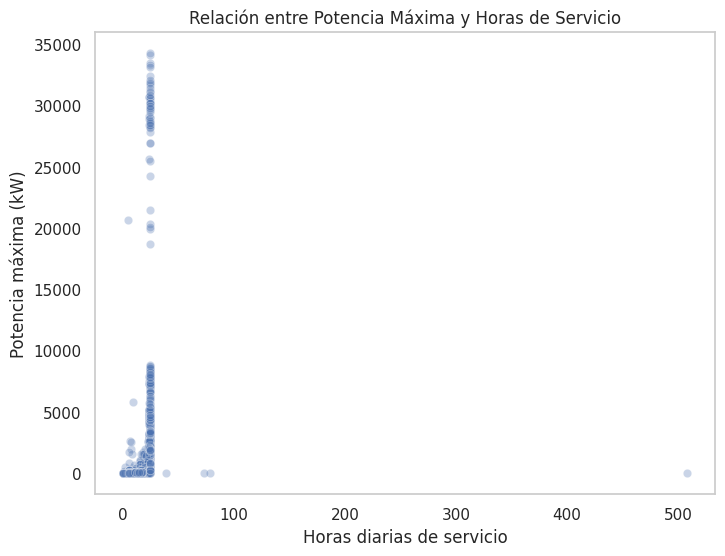

    hrs/dia_servicio
23              5.51
25              5.57
36              7.07
40              4.29
50              3.43
53              3.27
58              0.00
59              0.00
60              7.03
68              9.42


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- PRIMERA IMAGEN ----------
plt.figure(figsize=(10,5))
sns.boxplot(x=df_ZNI["potencia_max"], color="skyblue")
plt.title("Distribución de POTENCIA MÁXIMA (Boxplot)")
plt.show()

# ---------- ESTADÍSTICAS Y VALORES ----------
print("Estadísticas descriptivas de POTENCIA MÁXIMA:")
print(df_ZNI["potencia_max"].describe())
print(f"Valores nulos en POTENCIA MÁXIMA: {df_ZNI['potencia_max'].isna().sum()}")
print(f"Valores iguales a 0: {(df_ZNI['potencia_max']==0).sum()}")

# ---------- SEGUNDA IMAGEN ----------
top_dptos = df_ZNI["Departamento"].value_counts().head(6).index
plt.figure(figsize=(12,6))
for dpto in top_dptos:
    sns.kdeplot(
        df_ZNI[df_ZNI["Departamento"]==dpto]["potencia_max"],
        label=dpto,
        fill=True, alpha=0.3
    )
plt.title("Distribución de POTENCIA MÁXIMA por Departamento")
plt.legend()
plt.show()

# ---------- TABLA DE APAGONES ----------
apagones = df_ZNI[
    (df_ZNI["potencia_max"] < df_ZNI["potencia_max"].quantile(0.05)) &
    (df_ZNI["hrs/dia_servicio"] < 12)
]
print(f"\nPosibles apagones detectados: {len(apagones)} registros")
print(apagones[["Departamento","Municipio","Año","Mes","potencia_max"]].head(10))

# ---------- TERCERA IMAGEN ----------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="hrs/dia_servicio",
    y="potencia_max",
    data=df_ZNI,
    alpha=0.3
)
plt.title("Relación entre Potencia Máxima y Horas de Servicio")
plt.xlabel("Horas diarias de servicio")
plt.ylabel("Potencia máxima (kW)")
plt.grid()
plt.show()

# ---------- MOSTRAR TABLA DE HORAS DE SERVICIO ----------
print(apagones[["hrs/dia_servicio"]].head(10))


 ¿Qué permitirá esto?
 Ver la distribución de la potencia máxima → municipios con mayor o menor demanda pico.
 Identificar registros sospechosos (cortes de energía o anomalías).
 Comparar departamentos y tendencias en el tiempo.
 Relacionar la potencia con el servicio real para ver dónde hay más cortes.

Se decidió que para el análisis posterior las columnas que se necesitarán son: Departamento, Municipio, ID Localidad, Año, Mes, Energía Activa, Energía Reactiva

### **Corrreción Datos del promedio de horas**

In [94]:
#df_ZNI['Municipio'].values_counts()

Para corregir los datos del promedio de horas diarias del servicio electrico, primero filtramos los datos, unificamos los datos de la columna utilizando las mismas unidades, reemplazando las comas por puntos para facilitar las operaciones.

In [95]:
#voy a tomar aca solo localidad, promedio diario en horas, mes y año de servicio
df_ZNI_hprom = df_ZNI[['Departamento', 'Municipio', 'Localidad','Mes', 'Año','hrs/dia_servicio']]
df_ZNI_hprom.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,6,2024,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,6,2024,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,6,2024,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,6,2024,24.00
4,BOLÍVAR,CARTAGENA DE INDIAS,13001007,6,2024,9.40


In [96]:
#hago limpieza de los datos de la columna de prom. horas diarias
df_ZNI_hprom['hrs/dia_servicio'] = df_ZNI_hprom['hrs/dia_servicio'].replace(',', '.')
df_ZNI_hprom['hrs/dia_servicio'].head(3)

/tmp/ipython-input-736689231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ZNI_hprom['hrs/dia_servicio'] = df_ZNI_hprom['hrs/dia_servicio'].replace(',', '.')


,hrs/dia_servicio
0,24.00
1,24.00
2,10.18


A continuación, identificamos los datos atípicos o erróneos, es decir, aquellas filas en las que el promedio de horas diarias excede las 24 horas, lo cual resulta incoherente desde un punto de vista lógico.

In [97]:
#encuentro datos erroneos con promedio de horas diarias mayores a 24
df_ZNI_hprom[df_ZNI_hprom['hrs/dia_servicio'] > 24]

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
531,CAUCA,TIMBIQUÍ,19809007,12,2023,38.54
1061,ANTIOQUIA,VIGÍA DEL FUERTE,5873002,4,2023,508.00
1276,NARIÑO,MAGÜÍ,52427913,2,2023,78.00
2858,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,6,2021,72.40


Una vez identificados los datos erróneos en el documento, reemplazamos cada valor atípico por el promedio de los datos correspondientes a los demás meses del año en la misma localidad.

##### **Localidad Bojayá - Chocó (27099005)**

In [98]:
#En la localidad 27099005 mostrar todos los meses del año 2021
df_ZNI_hprom[(df_ZNI_hprom['Localidad'] == 27099005) & (df_ZNI_hprom['Año'] == 2021)]

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
2335,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,12,2021,5.13
2421,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,11,2021,5.53
2507,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,10,2021,4.49
2594,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,9,2021,3.41
2679,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,8,2021,6.43
2768,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,7,2021,6.12
2858,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,6,2021,72.40
2911,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,5,2021,7.35
2992,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,4,2021,7.14
3077,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,3,2021,5.46


In [99]:
df_localidad_bojaya = df_ZNI_hprom[df_ZNI_hprom['Localidad'] == 27099005]
df_localidad_bojaya.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
29,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,6,2024,6.20
115,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,7,2024,6.16
185,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,5,2024,7.39
271,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,1,2024,8.08
350,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,2,2024,7.43


In [100]:
df_localidad_bojaya.count()

,0
Departamento,45
Municipio,45
Localidad,45
Mes,45
Año,45
hrs/dia_servicio,45


##### **Localidad Timbiquí - Cauca (19809007)**

In [101]:
#En la localidad 19809007 mostrar todos los meses del año 2023
df_ZNI_hprom[(df_ZNI_hprom['Localidad'] == 19809007) & (df_ZNI['Año'] == 2023)]

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
531,CAUCA,TIMBIQUÍ,19809007,12,2023,38.54
613,CAUCA,TIMBIQUÍ,19809007,11,2023,6.15
668,CAUCA,TIMBIQUÍ,19809007,10,2023,7.15


In [102]:
# Datos de la localidad 19809007
df_localidad_timbiqui = df_ZNI_hprom[df_ZNI_hprom['Localidad'] == 19809007]
df_localidad_timbiqui.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
15,CAUCA,TIMBIQUÍ,19809007,6,2024,7.38
98,CAUCA,TIMBIQUÍ,19809007,7,2024,6.49
169,CAUCA,TIMBIQUÍ,19809007,5,2024,7.08
257,CAUCA,TIMBIQUÍ,19809007,1,2024,7.33
531,CAUCA,TIMBIQUÍ,19809007,12,2023,38.54


/tmp/ipython-input-3775838646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_localidad_timbiqui['Fecha'] = pd.to_datetime(df_localidad_timbiqui['Año'].astype(str) + '-' + df_localidad_timbiqui['Mes'].astype(str))


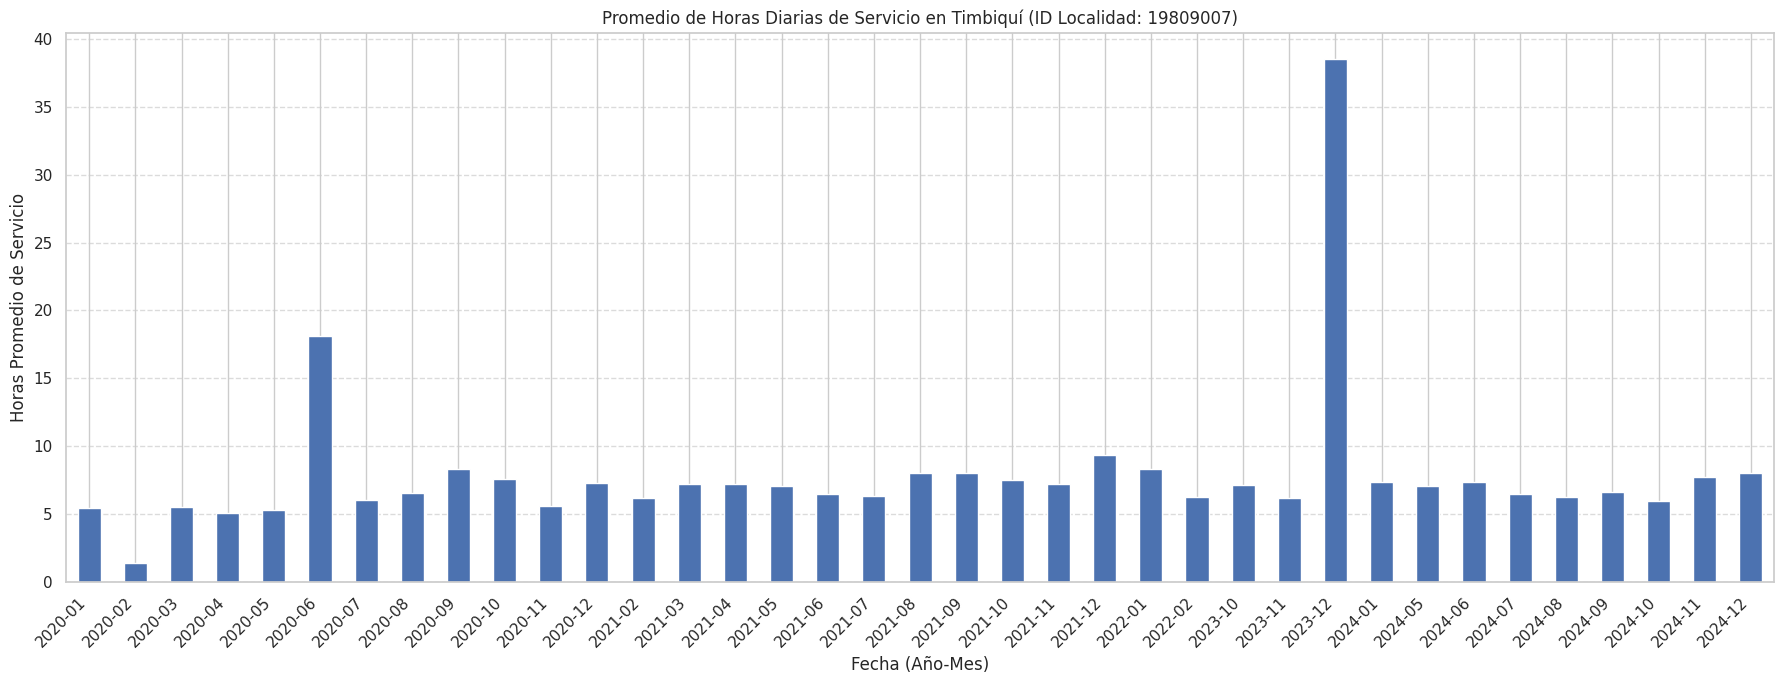

In [103]:
#Hago grafico de los datos de la localidad 19809007 timbiqui
# Crear una columna de fecha para graficar correctamente en orden cronológico
df_localidad_timbiqui['Fecha'] = pd.to_datetime(df_localidad_timbiqui['Año'].astype(str) + '-' + df_localidad_timbiqui['Mes'].astype(str))
df_localidad_timbiqui = df_localidad_timbiqui.sort_values('Fecha')

# Formatear la fecha como texto para un mejor control sobre las etiquetas del eje X
df_localidad_timbiqui['Fecha_str'] = df_localidad_timbiqui['Fecha'].dt.strftime('%Y-%m')


# Graficar usando la nueva columna de fecha y mejorar la visualización
ax = df_localidad_timbiqui.plot(
    x='Fecha_str',
    y='hrs/dia_servicio',
    kind='bar',
    figsize=(18, 7),  # Aumentar el tamaño para mayor claridad
    legend=False,
    title='Promedio de Horas Diarias de Servicio en Timbiquí (ID Localidad: 19809007)'
)

# Mejorar las etiquetas y el diseño del gráfico
ax.set_xlabel("Fecha (Año-Mes)", fontsize=12)
ax.set_ylabel("Horas Promedio de Servicio", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para evitar solapamiento
plt.tight_layout()  # Ajustar para que todo quepa correctamente
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una grilla para facilitar la lectura
plt.show()

In [104]:
df_localidad_timbiqui.count()

,0
Departamento,37
Municipio,37
Localidad,37
Mes,37
Año,37
hrs/dia_servicio,37
Fecha,37
Fecha_str,37


In [105]:
df_ZNI.head()

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,2024,6,3994102,1010671.0,7824.51,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,2024,6,127838,40378.0,256.00,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,2024,6,26578,11917.0,101.43,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,2024,6,1284196,274864.0,2241.56,24.00
4,BOLÍVAR,CARTAGENA DE INDIAS,13001007,2024,6,60724,28336.0,265.63,9.40


#####**Eliminamos los datos atipicos**

In [106]:
#Eliminamos los datos atipicos
df_ZNI_hprom = df_ZNI_hprom[df_ZNI_hprom['hrs/dia_servicio'] <= 24]
df_ZNI_hprom.count()

,0
Departamento,4656
Municipio,4656
Localidad,4656
Mes,4656
Año,4656
hrs/dia_servicio,4656


In [107]:
df_ZNI_hprom.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,6,2024,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,6,2024,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,6,2024,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,6,2024,24.00
4,BOLÍVAR,CARTAGENA DE INDIAS,13001007,6,2024,9.40


In [108]:
df_ZNI_hprom[(df_ZNI_hprom['Departamento']=='AMAZONAS') & (df_ZNI_hprom['Año']==2023)]['hrs/dia_servicio'].mean()
#

np.float64(18.68551724137931)

In [109]:
df_ZNI_hprom.loc[(df_ZNI_hprom['Departamento']==0), 'Departamento'] = 'CAUCA'

In [110]:
df_ZNI_hprom['Departamento'].unique()

array(['AMAZONAS', 'SAN ANDRÉS, P & SC', 'BOLÍVAR', 'CAQUETÁ', 'CAUCA',
       'CHOCÓ', 'GUAINÍA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO',
       'PUTUMAYO', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA', 'ANTIOQUIA',
       'GUAVIARE', 'CASANARE'], dtype=object)

In [111]:
#eliminar el departamento nombrado '0', pues es un dato erroneo
df_ZNI_hprom = df_ZNI_hprom[df_ZNI_hprom['Departamento'] != 0]
df_ZNI_hprom.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,6,2024,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,6,2024,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,6,2024,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,6,2024,24.00
4,BOLÍVAR,CARTAGENA DE INDIAS,13001007,6,2024,9.40


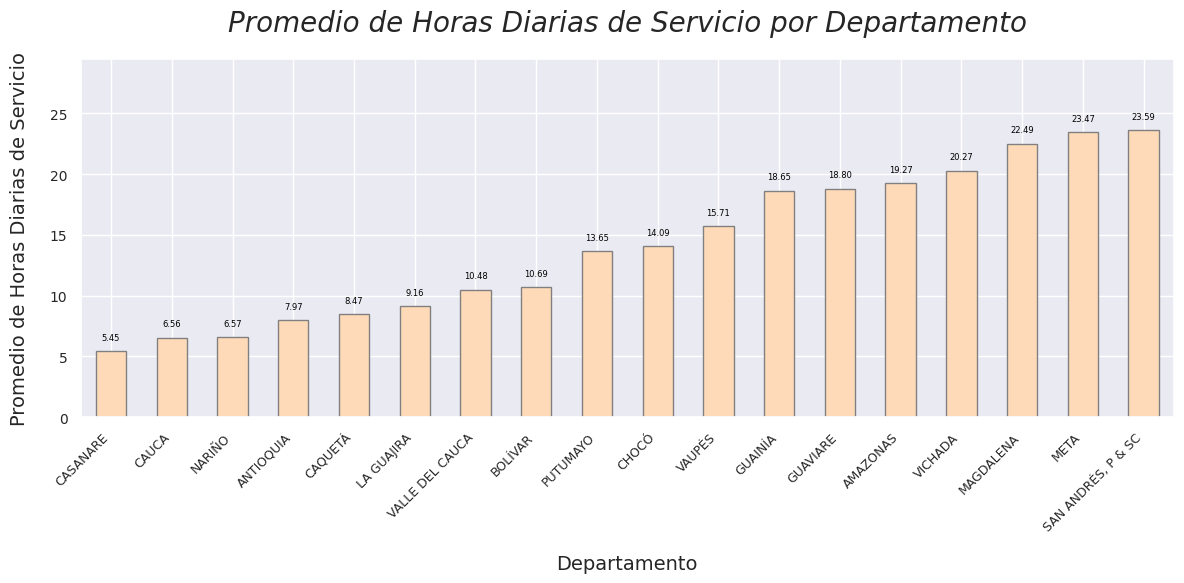

In [112]:
prom_h_departamento = df_ZNI_hprom.groupby(['Departamento'])['hrs/dia_servicio'].mean()

#plt.rcParams['font.family'] = 'sans-serif' # Puedes probar 'serif', 'monospace', 'fantasy', 'cursive'

sns.set_style("darkgrid")
prom_h_departamento.sort_values(ascending=True, inplace=True)

# Crea el gráfico de barras
ax =prom_h_departamento.plot(
    kind='bar',
    figsize=(12, 6),  # Ajusta el tamaño para mejor visualización
    color='peachpuff',  # Cambia el color de las barras
    edgecolor='grey' # Añade un borde a las barras
)

# Añade un título descriptivo
ax.set_title(
    'Promedio de Horas Diarias de Servicio por Departamento',
    fontsize=20,
    style= 'oblique',
    pad=20  # Espacio entre el título y el gráfico
)

# Etiquetas para los ejes
ax.set_xlabel(
    'Departamento',
    fontsize=14,
    labelpad=15 # Espacio entre la etiqueta y el eje
)
ax.set_ylabel(
    'Promedio de Horas Diarias de Servicio',
    fontsize=14,
    labelpad=15
)

# Mejora las etiquetas del eje X para que no se superpongan
plt.xticks(
    rotation=45,  # Rota las etiquetas para mejor legibilidad
    ha='right',   # Alinea el texto a la derecha
    fontsize=9
)

# Ajusta las etiquetas del eje Y
plt.yticks(fontsize=10)

ax.set_ylim(0, prom_h_departamento.max() * 1.25)

# Muestra el valor exacto encima de cada barra
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',  # Formatea a dos decimales
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),  # Desplaza el texto 10 puntos hacia arriba
        textcoords='offset points',
        fontsize=6,
        color='black'
    )

# Asegura que todos los elementos se ajusten dentro de la figura
plt.tight_layout()

# Muestra el gráfico
plt.show()

### **Gráfico prom. horas diarias de servicio y número de municipios NI por departamento**

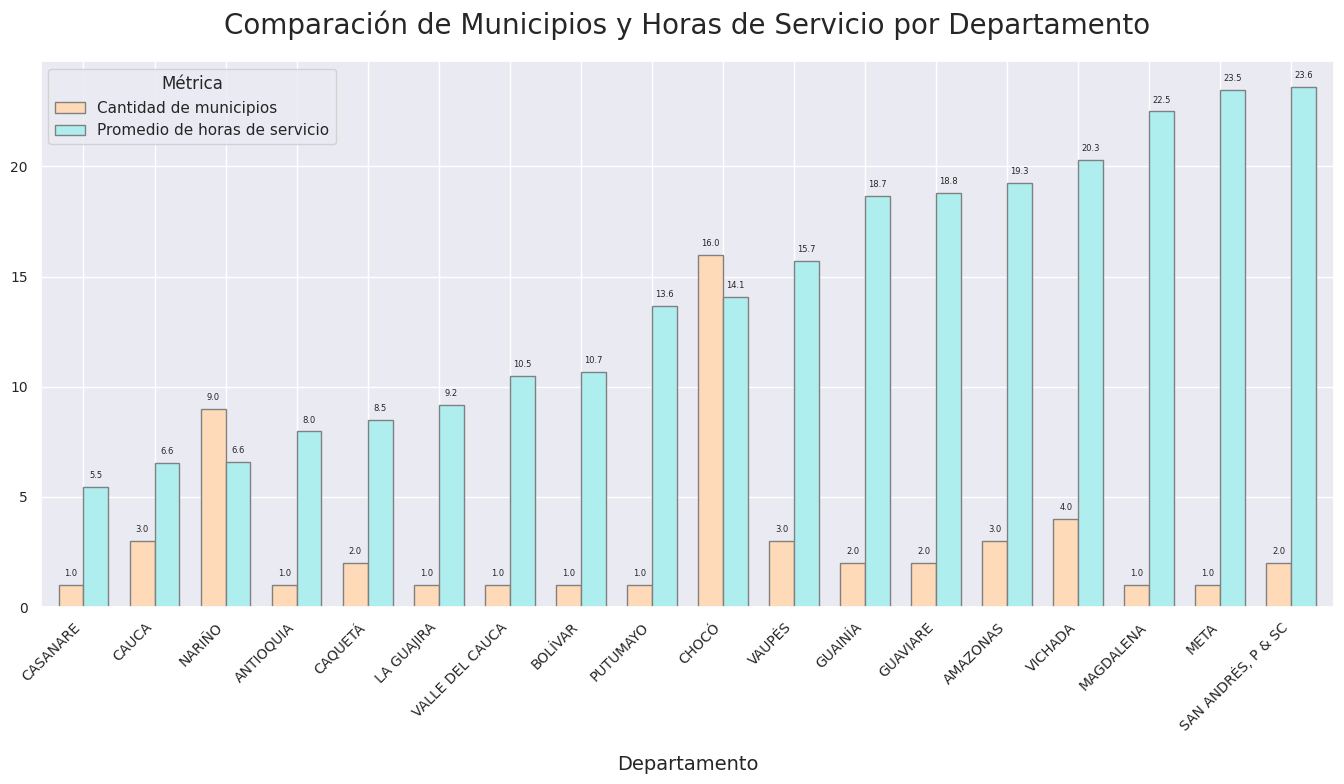

In [113]:
#  1: Obtener el conteo total de municipios por departamento
conteo_municipios = df_ZNI.groupby("Departamento")["Municipio"].nunique().sort_values(ascending=False)
total_municipios = df_ZNI_hprom.groupby('Departamento')['Municipio'].nunique()

# Unir ambos resultados en un solo DataFrame
df_comparacion = pd.DataFrame({
    'Cantidad de municipios': conteo_municipios,
    'Promedio de horas de servicio': prom_h_departamento
})

df_comparacion.sort_values(by='Promedio de horas de servicio', ascending=True, inplace=True)

#  2: Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(17, 8))

df_comparacion.plot(
    kind='bar',
    ax=ax,
    width=0.7,
    color=['peachpuff', 'paleturquoise'],
    edgecolor='grey')

#  3: Personalizar el gráfico
ax.set_title('Comparación de Municipios y Horas de Servicio por Departamento', fontsize=20, pad=20)
ax.set_xlabel('Departamento', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

ax.legend(title='Métrica', loc='upper left')

# Anotar los valores sobre cada barra
for p in ax.patches:
    valor = p.get_height()
    if valor > 0: # Solo anota si el valor no es 0
        ax.annotate(
            f'{valor:.1f}', # decimales
            xy=(p.get_x() + p.get_width() / 2, valor),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=6
        )
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show();

### **Corrección Datos de Energía (Energía Activa y Reactiva)** --> Parte de Simón

In [114]:
df_ZNI.head(2)

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,2024,6,3994102,1010671.0,7824.51,24.0
1,AMAZONAS,PUERTO NARIÑO,91540000,2024,6,127838,40378.0,256.00,24.0


In [115]:
df_ZNI[['energ_act', 'energ_react']].isna().sum() #Verificar si hay datos NAN

,0
energ_act,0
energ_react,0


In [116]:
df_ZNI[(df_ZNI['energ_act']<=0)&(df_ZNI['energ_react']<=0)] #Verificar que no hay datos negativos

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio
58,NARIÑO,MAGÜÍ,52427913,2024,6,0,0.0,0.00,0.0
59,NARIÑO,MAGÜÍ,52427915,2024,6,0,0.0,0.00,0.0
142,NARIÑO,MAGÜÍ,52427913,2024,7,0,0.0,0.00,0.0
143,NARIÑO,MAGÜÍ,52427915,2024,7,0,0.0,0.00,0.0
197,CHOCÓ,QUIBDÓ,27001029,2024,5,0,0.0,0.00,0.0
213,NARIÑO,MAGÜÍ,52427913,2024,5,0,0.0,0.00,0.0
214,NARIÑO,MAGÜÍ,52427915,2024,5,0,0.0,0.00,0.0
227,VAUPÉS,CARURÚ,97161000,2024,5,0,0.0,0.00,0.0
241,CAQUETÁ,SAN VICENTE DEL CAGUÁN,18753002,2024,1,0,0.0,0.00,0.0
260,CHOCÓ,ACANDÍ,27006003,2024,1,0,0.0,0.00,0.0


In [117]:
df_ZNI[['energ_act', 'energ_react']].describe()
#Count = Cuantos datos validos hay en cada columna
#Mean = La media promedio de la columna
#std = desviacion estandar con respecto a la media
#min = valor minimo
#max = valor maximo
#25% = El 25% de los datos esta por debajo de ese valor
#50% = La mediana, el punto medio
#75% = El 75% de los datos esta por debajo de este valor

,energ_act,energ_react
count,4.660000e+03,4.660000e+03
mean,3.837890e+05,1.119473e+05
std,1.857363e+06,4.995443e+05
min,0.000000e+00,0.000000e+00
25%,4.946500e+03,1.970000e+03
50%,1.234650e+04,4.993000e+03
75%,8.458450e+04,3.028550e+04
max,2.062092e+07,5.435213e+06


In [118]:
import numpy as np
df_ZNI['FP'] = df_ZNI['energ_act'] / np.sqrt((df_ZNI['energ_act'])**2 + (df_ZNI['energ_react'])**2)





In [119]:
# Se buscan los registros de apagones, en los cuales la FP resulta en una indeterminación 0/0
df_ZNI[(df_ZNI['energ_act'] == 0.0)].head()


,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio,FP
58,NARIÑO,MAGÜÍ,52427913,2024,6,0,0.0,0.0,0.0,NaN
59,NARIÑO,MAGÜÍ,52427915,2024,6,0,0.0,0.0,0.0,NaN
142,NARIÑO,MAGÜÍ,52427913,2024,7,0,0.0,0.0,0.0,NaN
143,NARIÑO,MAGÜÍ,52427915,2024,7,0,0.0,0.0,0.0,NaN
197,CHOCÓ,QUIBDÓ,27001029,2024,5,0,0.0,0.0,0.0,NaN


In [ ]:
# Se buscan los registros de apagones an nariño, es decir,  donde la energía activa es 0.0
df_ZNI[(df_ZNI['energ_act'] == 0.0)].head()


In [120]:
# Rellena los NaN de la columna FP del dataframe df_ZNI con ceros
df_ZNI['FP'].fillna(0, inplace=True)
df_ZNI[(df_ZNI['energ_act'] == 0.0)].head()

/tmp/ipython-input-1181160691.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ZNI['FP'].fillna(0, inplace=True)


,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio,FP
58,NARIÑO,MAGÜÍ,52427913,2024,6,0,0.0,0.0,0.0,0.0
59,NARIÑO,MAGÜÍ,52427915,2024,6,0,0.0,0.0,0.0,0.0
142,NARIÑO,MAGÜÍ,52427913,2024,7,0,0.0,0.0,0.0,0.0
143,NARIÑO,MAGÜÍ,52427915,2024,7,0,0.0,0.0,0.0,0.0
197,CHOCÓ,QUIBDÓ,27001029,2024,5,0,0.0,0.0,0.0,0.0


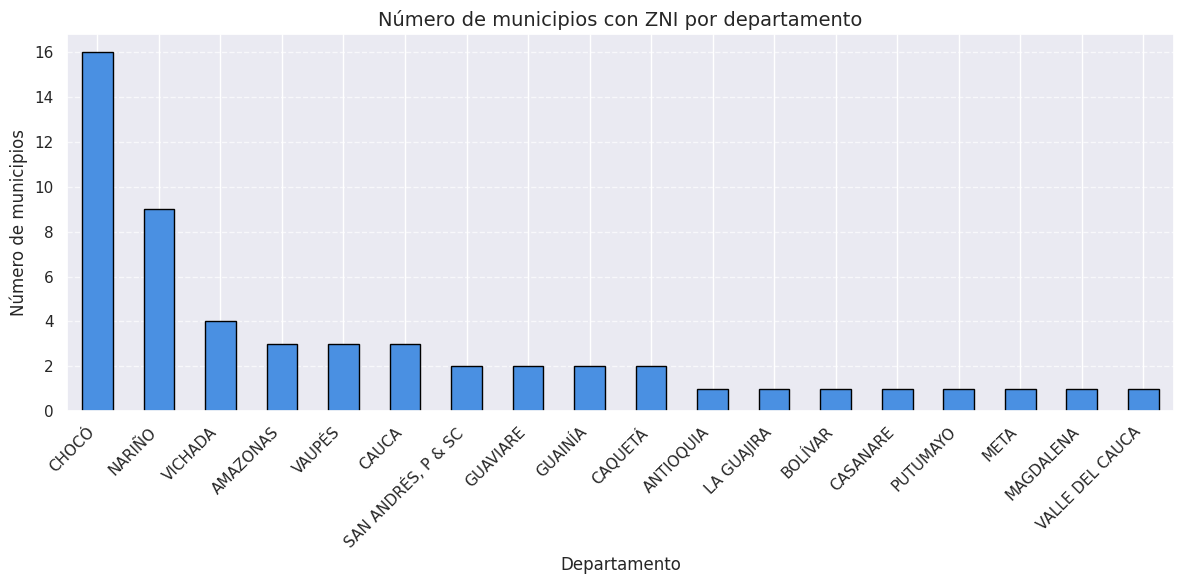

In [121]:
# gráfica para saber cuantos municipios con ZNI hay en cada departamento

# Agrupar por departamento y contar municipios únicos
conteo_municipios = df_ZNI.groupby("Departamento")["Municipio"].nunique().sort_values(ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
conteo_municipios.plot(kind="bar", color="#4a90e2", edgecolor="black")

# Títulos y etiquetas
plt.title("Número de municipios con ZNI por departamento", fontsize=14)
plt.xlabel("Departamento")
plt.ylabel("Número de municipios")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



**FUNCIÓN QUE GRAFICA DEPARTAMENTO Y ENERGIA (POTENCIA BASE, ENERGIA ACTIVA O ENERGIA REACTIVA) -> SIMÓN**


In [122]:
df_ZNI['Departamento'].unique()

array(['AMAZONAS', 'SAN ANDRÉS, P & SC', 'BOLÍVAR', 'CAQUETÁ', 'CAUCA',
       'CHOCÓ', 'GUAINÍA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO',
       'PUTUMAYO', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA', 'ANTIOQUIA',
       'GUAVIARE', 'CASANARE'], dtype=object)

### **Corrección Datos de Potencia (Potencia Máxima)** --> Parte de Yoab

In [144]:
# en df_ZNI buscar los registros del departamento CHOCÓ que tengan energía activa 0.0
df_ZNI[(df_ZNI['energ_act'] == 0.0) & (df_ZNI['Departamento'] == 'CHOCÓ')].head()

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio,FP
197,CHOCÓ,QUIBDÓ,27001029,2024,5,0,0.0,0.00,0.0,0.0
260,CHOCÓ,ACANDÍ,27006003,2024,1,0,0.0,0.00,0.0,0.0
279,CHOCÓ,MEDIO ATRATO (BETÉ),27425008,2024,1,0,0.0,0.17,0.0,0.0
356,CHOCÓ,MEDIO ATRATO (BETÉ),27425008,2024,2,0,0.0,0.00,0.0,0.0
551,CHOCÓ,MEDIO ATRATO (BETÉ),27425008,2023,12,0,0.0,0.00,0.0,0.0


# **Puntos a Analizar**

## **Distribución de las ZNI en el país**

* ¿Que departementos tienen más municipios con ZNI?
*


## **Análisis de calidad del servicio por departamento**

* ¿Qué departamentos tienen menos horas promedio de servicio al día? ¿Cuántas tienen menos de 6h/día, 12h/día, 24h/día?  ¿Cómo varía el promedio de horas de servicio en el tiempo (por mes/año)?


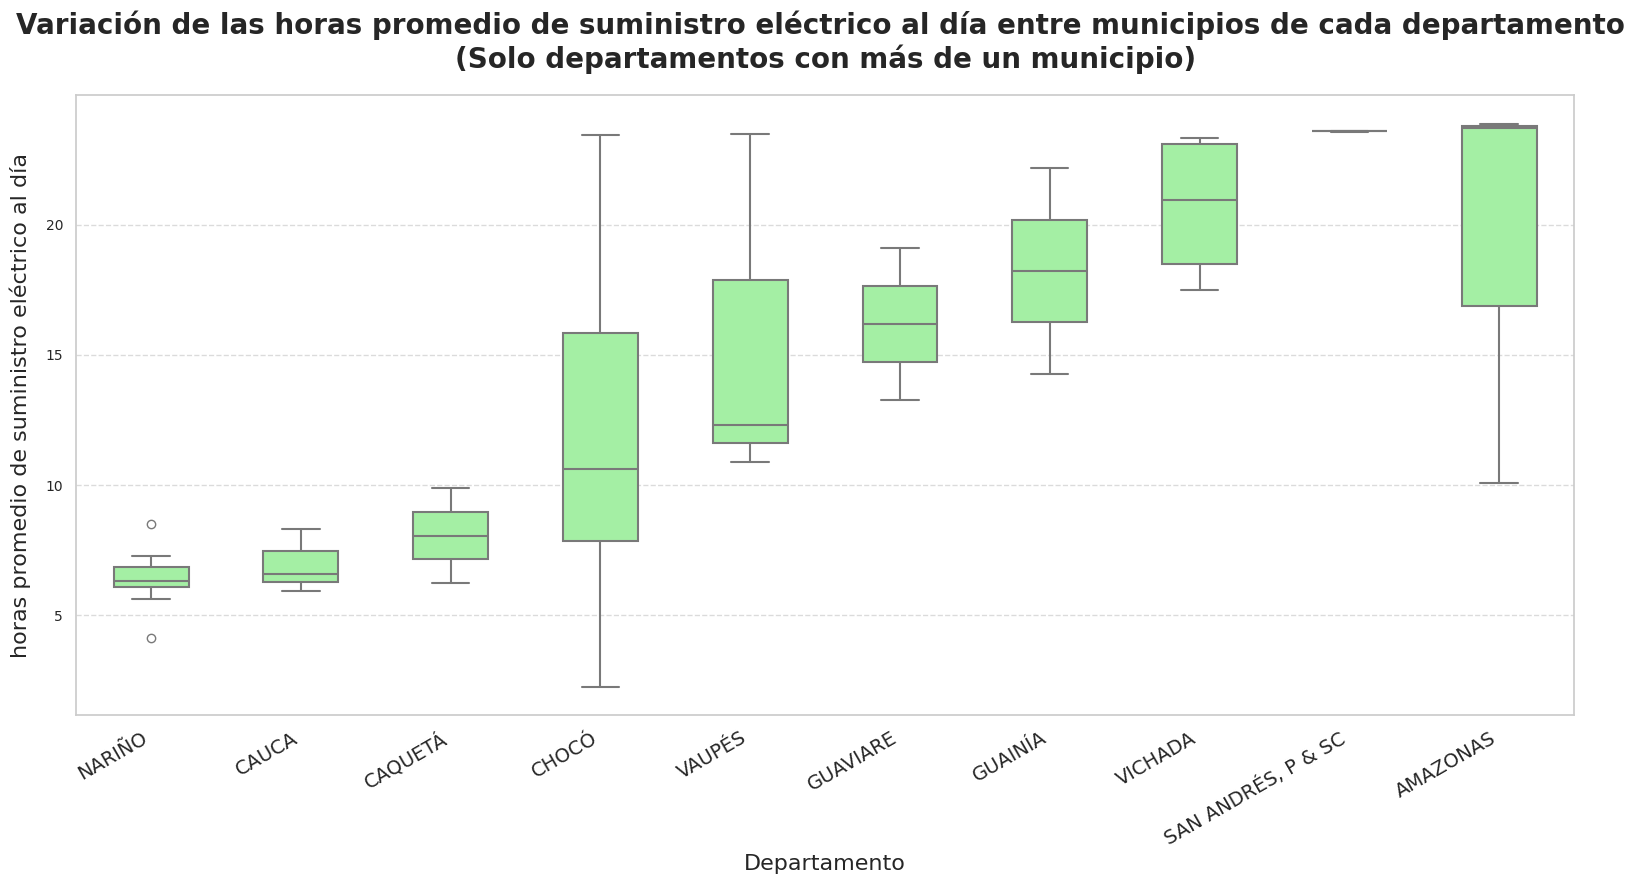

In [123]:
# Variable energética a analizar
variable_energetica = 'hrs/dia_servicio'  # o 'PB', etc.
nombre_variable = 'horas promedio de suministro eléctrico al día'
# Paso 1: Calcular media por municipio
media_por_municipio = df_ZNI.groupby(['Departamento', 'Municipio'])[variable_energetica].mean().reset_index(name='Media_Municipio')

# Paso 2: Filtrar departamentos con más de un municipio
municipios_por_dpto = media_por_municipio.groupby('Departamento')['Municipio'].nunique()
departamentos_validos = municipios_por_dpto[municipios_por_dpto > 1].index
media_filtrada = media_por_municipio[media_por_municipio['Departamento'].isin(departamentos_validos)]

# Paso 3: Ordenar departamentos por mediana de su variable (mejor lectura)
orden_dptos = media_filtrada.groupby('Departamento')['Media_Municipio'].median().sort_values().index

# Paso 4: Gráfico
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")

sns.boxplot(
    data=media_filtrada,
    x='Departamento',
    y='Media_Municipio',
    order=orden_dptos,        # Orden por mediana
    color = 'palegreen',
    width=0.5,                # Reduce ancho de las cajas
    linewidth=1.5               # Grosor del borde
)

# Títulos y ejes
plt.title(
    f'Variación de las {nombre_variable} entre municipios de cada departamento \n(Solo departamentos con más de un municipio)',
    fontsize=20,
    pad=20,
    fontweight='bold'
)
plt.xlabel('Departamento', fontsize=16)
plt.ylabel(f'{nombre_variable}', fontsize=16, labelpad=10)
plt.xticks(rotation=30, ha='right', fontsize=14)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas horizontales sutiles
plt.tight_layout()
plt.show()


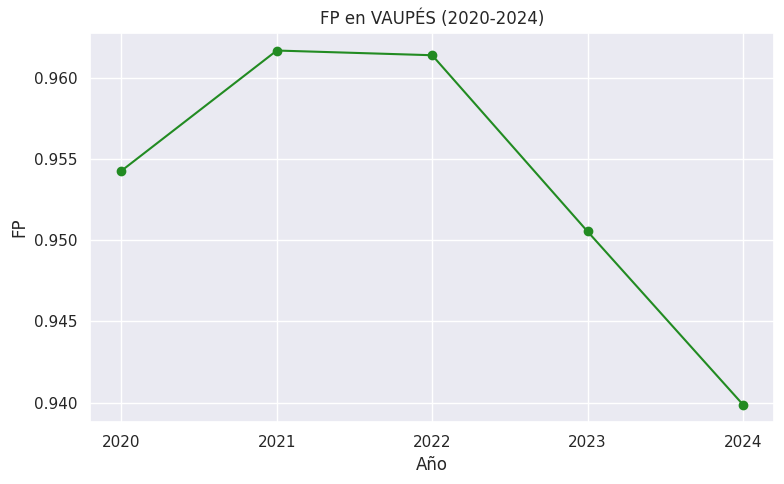

In [127]:
def graficar_tiempo_dpto(departamento, variable):
    # Validar que la variable exista
    if variable not in ["energ_act", "energ_react", "FP"]:
        raise ValueError("La variable debe ser 'energ_act', 'energ_react' o 'FP'")

    # Filtrar por departamento
    df_filtrado = df_ZNI[df_ZNI["Departamento"] == departamento]

    # Filtrar años entre 2020 y 2024
    df_filtrado = df_filtrado[df_filtrado['Año'].between(2020, 2024)]

    # Agrupar por año y sumar la variable seleccionada
    df_agrupado = df_filtrado.groupby("Año")[variable].mean().reset_index()

    # Graficar
    plt.figure(figsize=(8, 5))
    plt.plot(df_agrupado["Año"], df_agrupado[variable], marker='o', linestyle='-', color='forestgreen')
    plt.title(f'{variable} en {departamento} (2020-2024)')
    plt.xlabel('Año')
    plt.ylabel(variable)
    plt.grid(True)
    plt.xticks(range(2020, 2025))
    plt.tight_layout()
    plt.show()

graficar_tiempo_dpto('VAUPÉS', 'FP')

#### **Análisis municipal del chocó**

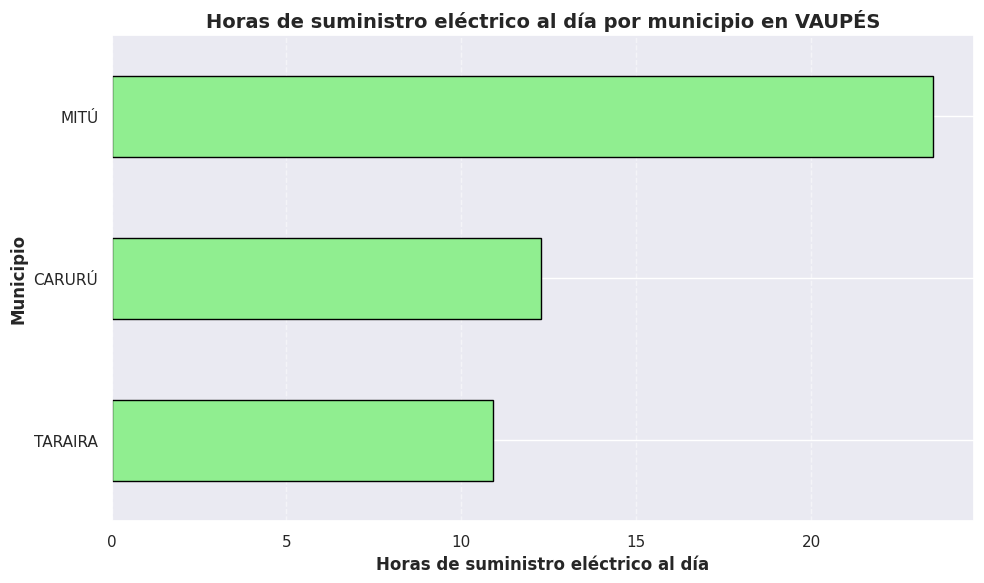

In [143]:
def graficar_municipios_por_variable(df, departamento, variable):
    nombres_legibles = {
        'energ_act': 'Energía activa',
        'energ_react': 'Energía reactiva',
        'potencia_max': 'Potencia máxima',
        'hrs/dia_servicio': 'Horas de suministro eléctrico al día',
        'FP': 'Factor de potencia'}

    datos = df[df['Departamento'] == departamento]
    medias = datos.groupby('Municipio')[variable].mean().sort_values()
    plt.figure(figsize=(10, 6))
    medias.plot(kind='barh', color='lightgreen', edgecolor='black')

    plt.title(f"{nombres_legibles.get(variable, variable)} por municipio en {departamento}", fontsize=14, loc='center', weight='bold' )
    plt.xlabel(nombres_legibles.get(variable, variable), fontweight='bold')
    plt.ylabel('Municipio', fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

graficar_municipios_por_variable(df_ZNI, 'VAUPÉS', 'hrs/dia_servicio')

## **Comparar consumo de energía activa entre zonas**

* ¿Cuáles son las localidades o municipios con mayor consumo?
* ¿El consumo ha aumentado con el tiempo en ciertos departamentos?
* ¿Se puede asociar un bajo consumo con bajo acceso (pocas horas al día)?


🔎 Agrupa por localidad o municipio y compara por AÑO o MES.

## **Relación entre energía activa y energía reactiva**

* ¿Qué tan eficientes son las zonas en su uso energético? (FP)
* ¿Qué tan alto es el nivel de energía reactiva respecto a la activa?
* ¿Dónde hay pérdidas significativas por mala calidad de equipos?

🔎 Calcula el factor de potencia:  
FP ≈ Energía Activa / √(Energía Activa² + Energía Reactiva²)  
Filtra zonas con bajo factor de potencia.


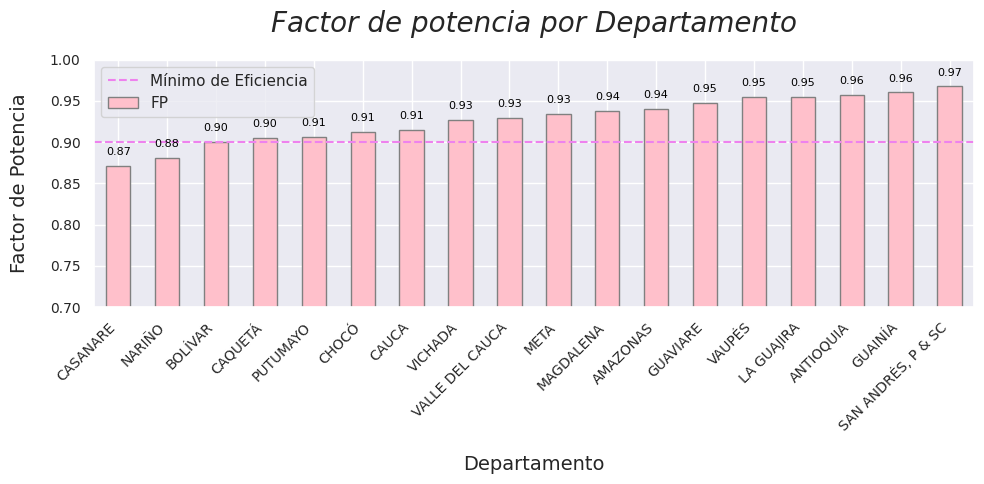

In [125]:
# Probar factor de potencia por departamento

prom_PB_departamento = df_ZNI.groupby(['Departamento'])['FP'].mean()
prom_PB_departamento = prom_PB_departamento.sort_values(ascending=True)

sns.set_style("darkgrid")
# Crea el gráfico de barras
ax =prom_PB_departamento.plot(
    kind='bar',
    figsize=(10, 5),  # Ajusta el tamaño para mejor visualización
    color='pink',  # Cambia el color de las barras
    edgecolor='grey')

# Añade un título descriptivo
ax.set_title(
    'Factor de potencia por Departamento',
    fontsize=20,
    style= 'oblique',
    pad=20 )

# Etiquetas para los ejes
ax.set_xlabel(
    'Departamento',
    fontsize=14,
    labelpad=15 )
ax.set_ylabel(
    'Factor de Potencia',
    fontsize=14,
    labelpad=15)

# Mejora las etiquetas del eje X para que no se superpongan
plt.xticks(
    rotation=45,  # Rota las etiquetas para mejor legibilidad
    ha='right',   # Alinea el texto a la derecha
    fontsize=10)

# Ajusta las etiquetas del eje Y
plt.yticks(fontsize=10)

ax.set_ylim(0.7, 1)

# Muestra el valor exacto encima de cada barra (opcional pero muy útil)
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',  # Formatea a dos decimales
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),  # Desplaza el texto 10 puntos hacia arriba
        textcoords='offset points',
        fontsize=8,
        color='black'    )

# Asegura que todos los elementos se ajusten dentro de la figura
plt.tight_layout()

#Crea una línea moteada en y= 0.9 que tenga la leyenda "Línea mínima"
plt.axhline(y=0.9, color='violet', linestyle='--', label='Mínimo de Eficiencia')
plt.legend()

# Muestra el gráfico
plt.show()

## **Estacionalidad en demanda máxima (Potencia Máxima)**

* ¿En qué meses tiende a darse la mayor `POTENCIA MÁXIMA`?
* ¿Se repite un patrón entre localidades o municipios?
* ¿Existen meses críticos por alta demanda?

🔎 Agrupa por `MES SERVICIO` y analiza la variación de la `POTENCIA MÁXIMA`. Puedes usar diagramas de violín, boxplots o líneas.


## **Relación entre variables energéticas**

* ¿Más horas de servicio se traducen en mayor consumo?
* ¿Mayor FP genera picos de potencia más altos?

🔎 Usa gráficos de dispersión (`scatter plots`) y mapas de correlación (`heatmaps`) para visualizar relaciones entre:
- Potencia Base (Eficiencia)
- Potencia Máxima ()
- Promedio Diario en Horas


## **Top y bottom performers energéticos**

* ¿Qué localidades tienen mayor potencia máxima?
* ¿Dónde se presta menos horas de servicio por día?
* ¿Qué zonas tienen el peor rendimiento energético?

🔎 Identifica las 10 mejores y 10 peores localidades en:
- Energía Activa total
- Promedio de horas diarias
- Factor de potencia
Utiliza tablas ordenadas, gráficos de barras horizontales y mapas si puedes.


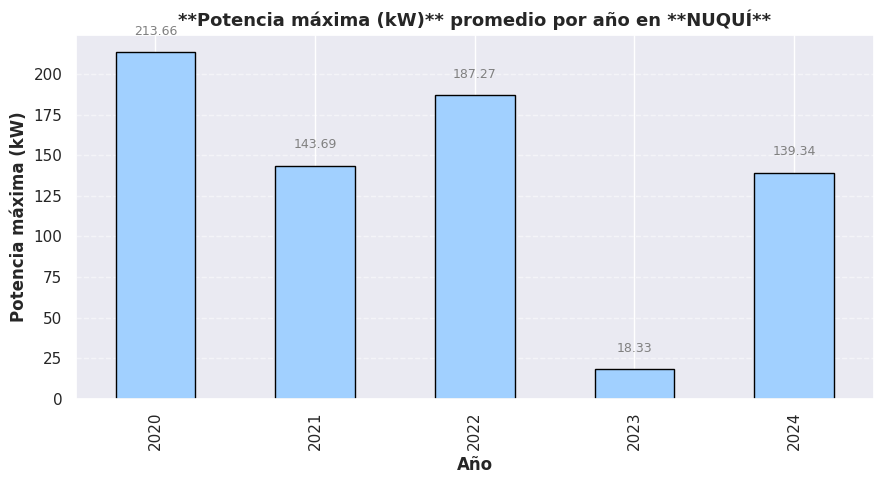

In [153]:
def graficar_variable_en_municipio(df, municipio, variable_cod):
    nombres = {
        'energ_act': 'Energía activa (kWh)',
        'energ_react': 'Energía reactiva (kVArh)',
        'potencia_max': 'Potencia máxima (kW)',
        'hrs/dia_servicio': 'Horas promedio de suministro eléctrico al día',
        'FP': 'Factor de potencia'
    }
    nombre_variable = nombres.get(variable_cod, variable_cod)
    datos = df[df['Municipio'] == municipio]

    if datos.empty:
        print(f"No se encontraron datos para el municipio: {municipio}")
        return

    promedios = datos.groupby("Año")[variable_cod].mean()

    plt.figure(figsize=(9, 5))
    ax = promedios.plot(kind='bar', color='#a1d0ff', edgecolor='black')

    for i, v in enumerate(promedios):
        ax.text(i, v + 0.05 * max(promedios), f'{v:.2f}', ha='center', fontsize=9, color='gray')

    plt.title(f'**{nombre_variable}** promedio por año en **{municipio}**', fontsize=13, weight='bold')
    plt.xlabel('Año', weight='bold')
    plt.ylabel(nombre_variable, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

graficar_variable_en_municipio(df_ZNI, 'NUQUÍ', 'potencia_max')